# CS5100 Final Project

Name: Trenton Creamer

Goal: This assignment will allow you to apply your knowledge of machine learning that you have aquired in this course on a real-world dataset of your choosing per the assignment specifications.

Complete the notebook and demonstrate your mastery of the topic.

## Prerequisites

In this section describe any packages that need to be installed or any additional setup that needs to take place before trying to run code.


import numpy as np

import matplotlib.pyplot as plt
from utility.util import configure_plots

configure_plots()

from sklearn.preprocessing import normalize

from utility.util import pair_plot

from sklearn.model_selection import train_test_split

from utility.util import Model


In [52]:
import numpy as np

# import matplotlib.pyplot as plt
# from utility.util import configure_plots

# configure_plots()

# from sklearn.preprocessing import normalize

# from utility.util import pair_plot

# from sklearn.model_selection import train_test_split

# from utility.util import Model

import datetime

## Problem

In this section, you will explain the problem you are trying to solve, the things you are trying to learn, and how you want to visualize the results.

I want to use this machine learning model to better predict patterns and trends in 911 calls. This could help the Seattle police department with staffing and resource allocation. If they know that certain 911 calls are more frequent during different seasons or during times of the day, then they can be better prepared for this. 

I could also use location to look for clusters or patterns in the data. This could help the police determine where to keep police members present. For example, hotspots of crime could potentially have a mobile police station parked there.

## Data

In this section you will describe the dataset (corpus) you are using. Explain who collected the data, how they did it, the manner in which it was stored, the way you accessed the data, what steps you will have to do to clean it, and so on. Provide any relavent details.

## Cleaning the Data

Add the code to download/query you data. If your data is already downloaded, then load it into your program here. Then add the code to clean it.

In [198]:
def parse_csv(line):
    return line.strip().split(',')

def load_data(path, parsefn):
    with open(path) as file:
        return [parsefn(line) for line in file]

police_call_data = load_data('Seattle_Real_Time_Fire_911_CallsCleaned.csv', parse_csv)

headings, data = police_call_data[0], police_call_data[1:]
# Data before we clean it 
print(headings)
for i in range(5):
    print(data[i])


['Address', 'Type', 'Datetime', 'Latitude', 'Longitude', 'Report Location', 'Incident Number']
['607 3RD AVE', 'Rescue Elevator', '4/1/22 0:02', '47.602813', '-122.331449', 'POINT (-122.331449 47.602813)', 'F220037342']
['6TH AVE W / W MCGRAW ST', 'Triaged Incident', '4/1/22 0:03', '47.639596', '-122.36495', 'POINT (-122.36495 47.639596)', 'F220037343']
['500 5th Ave', 'Aid Response', '4/1/22 0:07', '47.602985', '-122.328535', 'POINT (-122.328535 47.602985)', 'F220037344']
['401 Lenora St', 'Aid Response', '4/1/22 0:09', '47.613838', '-122.341324', 'POINT (-122.341324 47.613838)', 'F220037345']
['2900 1st Ave', 'Aid Response', '4/1/22 0:14', '47.616918', '-122.352507', 'POINT (-122.352507 47.616918)', 'F220037347']


In [199]:
# Use buckets for the different hours 
# Can use dates for seasons 
# Days of the week 

# Geo map the coordinates 
# Geopy geo pandas - can use lat and long 

# Get the column index of the datetime string column

from datetime import datetime

# Define the datetime format string
datetime_format = '%m/%d/%y %H:%M'

# Encode the timestamps by morning, afternoon evening 
headings.append("Time of the Day")
time_ranges = [(4,10), (11,16), (17,20), (21,23), (0,3)]
labels = ['Morning', 'Afternoon', 'Evening', 'Late Night', 'Early Morning']
# time_of_day_map = {'Early Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Late Night': 4}


# New Heading to Label our Days of the Week
headings.append("Day of the week")

# Can potentially label by Seasons


# Getting the Datetime columen to reference in our conversion
datetime_col_index = headings.index('Datetime')

# Convert each datetime string to a timestamp data type
for row in data:
    # Getting the datetime string 
    datetime_string = row[datetime_col_index]
    # Convert the string to a datetime object 
    datetime_object = datetime.strptime(datetime_string, datetime_format)

    # Extract the hours out of our datetime object so we know how to encode and label by hour range
    hour = datetime_object.hour

    # Creating a Time of Day column with our labeled data 
    for i, tr in enumerate(time_ranges):
        # Making sure the value is in the correct range
        if tr[0] <= hour <= tr[1]:
            row.append(labels[i])
            break

    # Getting the day of the week for this line of data
    day_name = datetime_object.strftime("%A")
    # Append the day of the week to our day of the week column
    row.append(day_name)

    # Update our datetime string with the converted datetime object
    row[datetime_col_index] = datetime_object



In [206]:
# Convert the long and lat to floats 
latitude_col_index = headings.index('Latitude')
longitude_col_index = headings.index('Longitude')
for row in data:
    lat_string = row[latitude_col_index]
    long_string = row[longitude_col_index]
    # only attempt conversion if the values are not empty 
    # This will handle Null value errors 
    if lat_string and long_string: 
        row[latitude_col_index] = float(lat_string)
        row[longitude_col_index] = float(long_string)

    else:
        row[latitude_col_index] = 0.0
        row[longitude_col_index] = 0.0

# Check that we have cleaned all of our data completely
print(headings)
print(len(headings))
print(len(data[0]))
print(len(data))
for i in range(51):
    print(data[i])



['Address', 'Type', 'Datetime', 'Latitude', 'Longitude', 'Report Location', 'Incident Number', 'Time of the Day', 'Day of the week']
9
9
124280
['607 3RD AVE', 'Rescue Elevator', datetime.datetime(2022, 4, 1, 0, 2), 47.602813, -122.331449, 'POINT (-122.331449 47.602813)', 'F220037342', 'Early Morning', 'Friday']
['6TH AVE W / W MCGRAW ST', 'Triaged Incident', datetime.datetime(2022, 4, 1, 0, 3), 47.639596, -122.36495, 'POINT (-122.36495 47.639596)', 'F220037343', 'Early Morning', 'Friday']
['500 5th Ave', 'Aid Response', datetime.datetime(2022, 4, 1, 0, 7), 47.602985, -122.328535, 'POINT (-122.328535 47.602985)', 'F220037344', 'Early Morning', 'Friday']
['401 Lenora St', 'Aid Response', datetime.datetime(2022, 4, 1, 0, 9), 47.613838, -122.341324, 'POINT (-122.341324 47.613838)', 'F220037345', 'Early Morning', 'Friday']
['2900 1st Ave', 'Aid Response', datetime.datetime(2022, 4, 1, 0, 14), 47.616918, -122.352507, 'POINT (-122.352507 47.616918)', 'F220037347', 'Early Morning', 'Friday']


In [37]:
# Making sure the datetime data is correctly converted
for i in range(5):
    dt = data[i][datetime_col_index]  # Assuming the datetime object is at datetime_col_index
    year = dt.year
    month = dt.month
    day = dt.day
    hour = dt.hour
    minute = dt.minute
    print("Row {}: Date: {}-{}-{}, Time: {}:{}".format(i+1, year, month, day, hour, minute))




Row 1: Date: 2022-4-1, Time: 0:2
Row 2: Date: 2022-4-1, Time: 0:3
Row 3: Date: 2022-4-1, Time: 0:7
Row 4: Date: 2022-4-1, Time: 0:9
Row 5: Date: 2022-4-1, Time: 0:14


## Learning Model

In detailed and documented Python, walk the user through your code below similar to the Twitter assignment.

In [201]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
from utility.util import configure_plots

configure_plots()



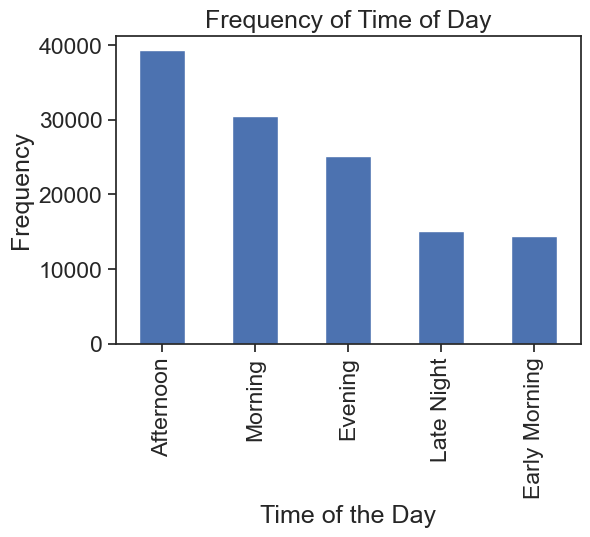

In [212]:

# Create a dataframe object with our data and column headings, data object will look similiar to a spreadsheet 
df = pd.DataFrame(data, columns=headings)
# print(df)

# Count the number of occurrences of each unique Time of the Day value
time_of_day_counts = df['Time of the Day'].value_counts()

# Create a bar chart of the Time of the Day counts
time_of_day_counts.plot(kind='bar', figsize=(6,4 ))
plt.xlabel('Time of the Day')
plt.ylabel('Frequency')
plt.title('Frequency of Time of Day')
plt.show()


Friday       18681
Saturday     18262
Thursday     17982
Monday       17628
Wednesday    17539
Tuesday      17477
Sunday       16711
Name: Day of the week, dtype: int64


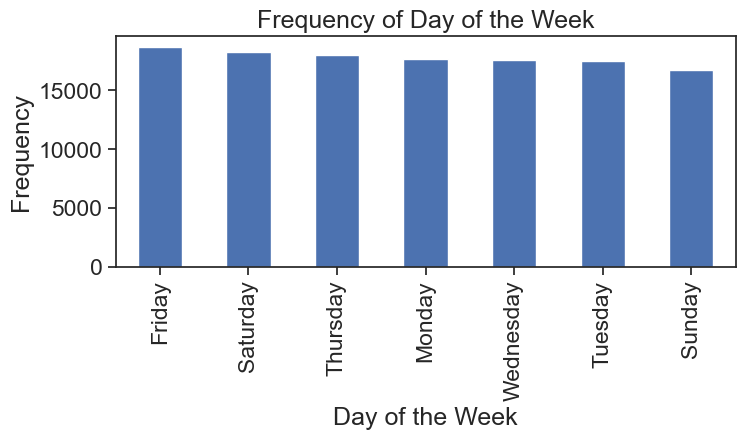

In [218]:
# Count the number of occurrences of each value in the day of the week column 
time_of_day_counts = df['Day of the week'].value_counts()
print(time_of_day_counts)

# Bar chart to show the counts of event at different times in the day 
time_of_day_counts.plot(kind='bar', figsize=(8,3))
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of Day of the Week')
plt.show()

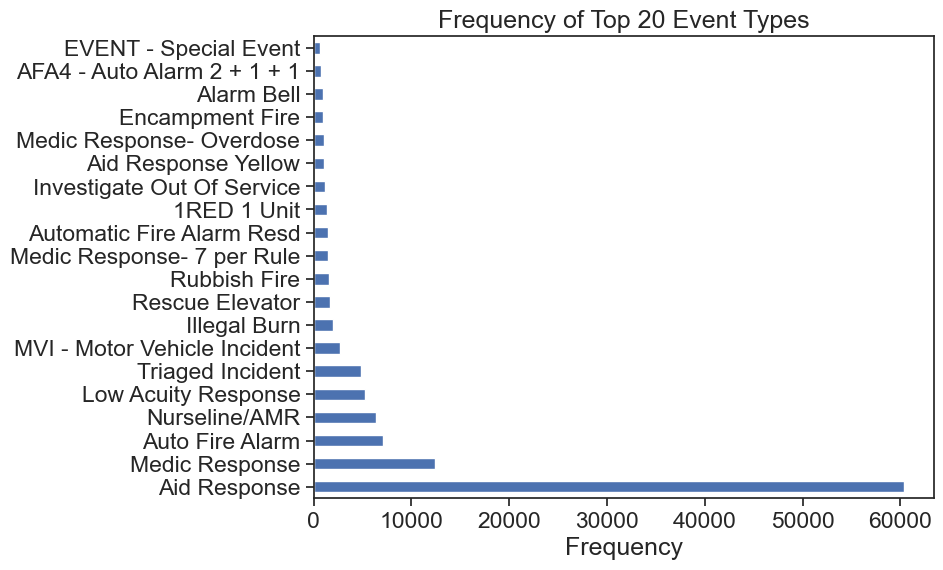

In [219]:

# Count the number of occurrences of each unique event type
event_type_counts = df['Type'].value_counts()

# Select only the top 20 event types by frequency
top_event_types = event_type_counts.nlargest(20)

# Horizontal bar chart of the top 20 events
plt.figure(figsize=(8, 6))
# barh = bar horizontal 
top_event_types.plot(kind='barh')
plt.xlabel('Frequency')
plt.title('Frequency of Top 20 Event Types')
plt.show()

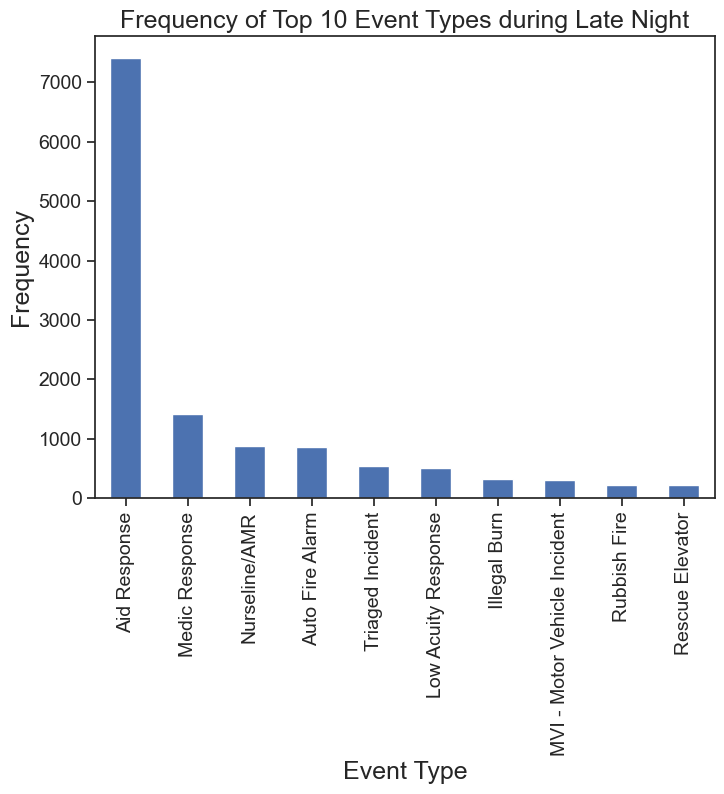

In [223]:
# Filter the data to include only events that occur during the Late Night time period
df_late_night = df[df['Time of the Day'] == 'Late Night']

# Count the frequency of each event type during the Late Night time period
event_type_counts = df_late_night['Type'].value_counts()

# Limit to top 10 event types
event_type_counts = event_type_counts.head(10)

# Create a bar chart of the frequency of each event type during the Late Night time period
event_type_counts.plot(kind='bar', figsize=(8, 6))

plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Event Types during Late Night', fontsize=18)
plt.tick_params(labelsize=14)

plt.show()

124280


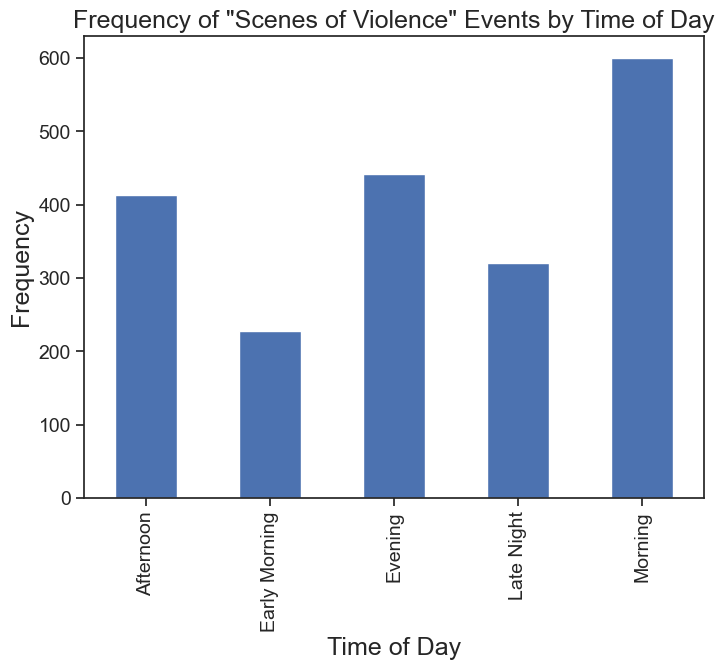

In [221]:
df = pd.DataFrame(data, columns=headings)
print(len(df))

# Filter data by the event type Illegal Burn
df_violence = df[df['Type'] == 'Illegal Burn']

# Use panda dataframe to group by Time of the and the count, similiar to a pivot table tin Excel
time_of_day_counts = df_violence.groupby('Time of the Day')['Time of the Day'].count()

time_of_day_counts.plot(kind='bar', figsize=(8,6))

plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.title('Frequency of "Scenes of Violence" Events by Time of Day', fontsize=18)
plt.tick_params(labelsize=14)

# Show the plot
plt.show()

## Tuning and Feature Extraction

Add and describe code to perform Hyperparameter Tuning and Feature Extraction or PCA.

## Visuals

Below, generate the visuals that will explain the results you are getting and show what you hoped to learn from the data.

## Refection

1. What issues did you encounter when aquiring and cleaning the data?
2. What features did you use in your final model and why were others excluded?
3. Which ML methods did you use and why? Which performed best before you started tuning? Did things change after tuning?
4. What was your accuracy before and then after cross validation?
5. What was the most challenging part of this project?